# Assignment 3-1
## Topic: Using the Keras Functional API (2 points)

Create a neural network with identical multiple inputs as shown in the image below.
* The number of neurons in the layers or the activation function does not matter, define them yourself freely.

Tips:
* Use the `Concatenate` layer to combine the `Input2` and the third `Dense` layer into the input of the `Dense` layer shown in the left image.
* Use the `Concatenate` layer to combine the `Input3` and the third `Dense` layer as the input of the `Dense` layer shown in the right image.

* Hint: `Add` layer documentation: [https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th)

Tip! See the following diagram before starting to create an identical model with Keras:

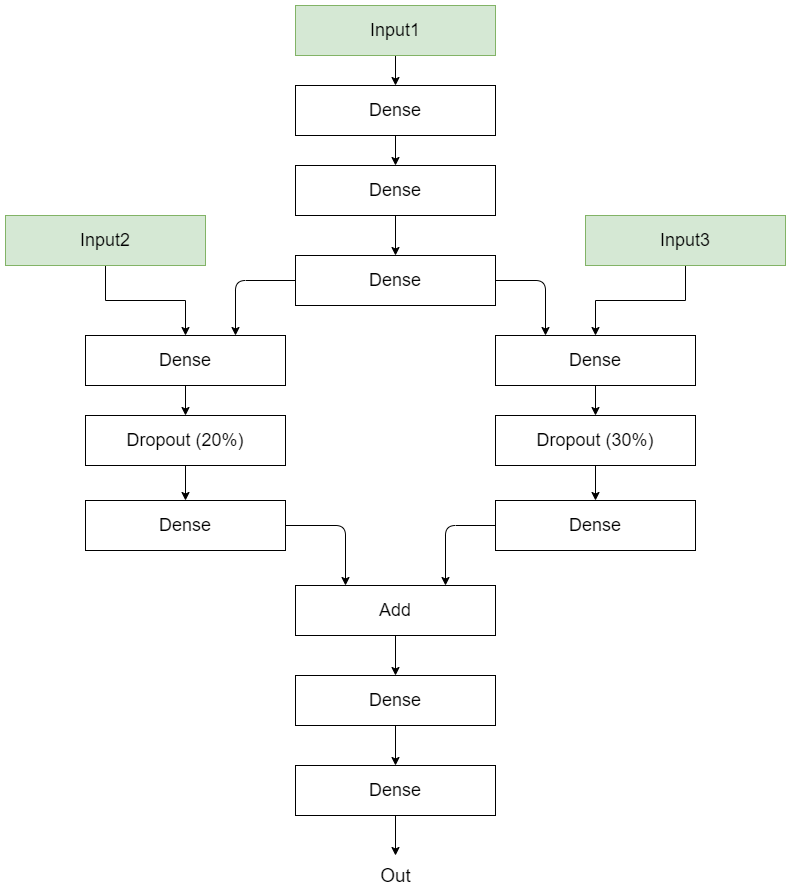

In [1]:
from IPython.display import Image
Image('../img/keras_functional_task.png')

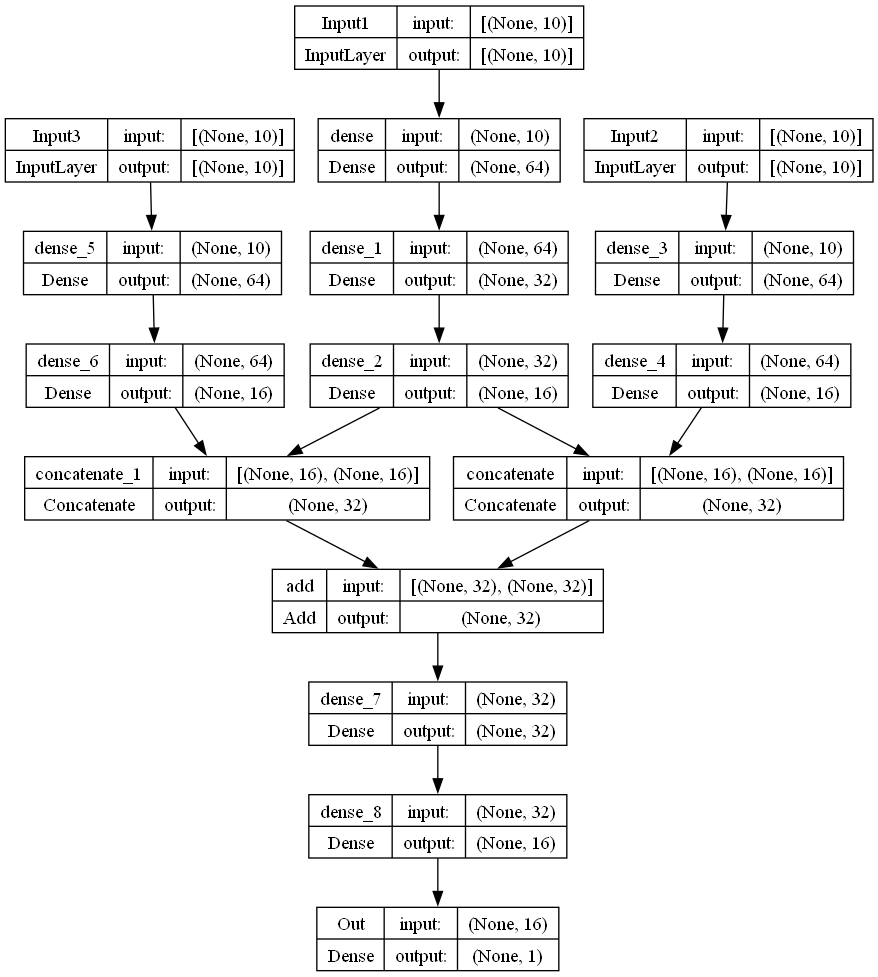

In [2]:
# TODO: Implementation of the assignment
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Concatenate, Add

# TODO: define three input layer
# input1, input2, input3 = tf.keras.Input(shape=(10,)) ... )
input1 = Input(shape=(10,), name='Input1')
input2 = Input(shape=(10,), name='Input2')
input3 = Input(shape=(10,), name='Input3')

# TODO: Middle layer
# middle_dense1 = tf.keras.layers.Dense(...)(input1)
middle_dense1 = Dense (64, activation='relu')(input1)
middle_dense2 = Dense (32, activation='relu')(middle_dense1)
middle_dense3 = Dense (16, activation='relu')(middle_dense2)

# TODO: left branch
# left_concat = tf.keras.layers.concatenate(...)
left_dense1 = Dense (64, activation='relu')(input2)
left_dropout = Dropout(0.2)(left_dense1)
left_dense1 = Dense (16, activation='relu')(left_dense1)
left_concat = Concatenate()([left_dense1, middle_dense3])

# TODO: right branch
right_dense1 = Dense (64, activation='relu')(input3)
right_dropout = Dropout(0.3)(right_dense1)
right_dense1 = Dense (16, activation='relu')(right_dense1)
right_concat = Concatenate()([right_dense1, middle_dense3])


# TODO: join the left and right branches to the Add layer
combined = Add()([left_concat, right_concat])
# TODO: Set the model you created in the model_functional variable.
final_dense1 = Dense(32, activation='relu')(combined)
final_dense2 = Dense(16, activation = 'relu')(final_dense1)

ouput = Dense(1, activation='sigmoid', name='Out')(final_dense2)

model_functional = tf.keras.Model(inputs=[input1, input2, input3], outputs=ouput)

tf.keras.utils.plot_model(model_functional, to_file='model.png', show_shapes=True,show_layer_names=True)

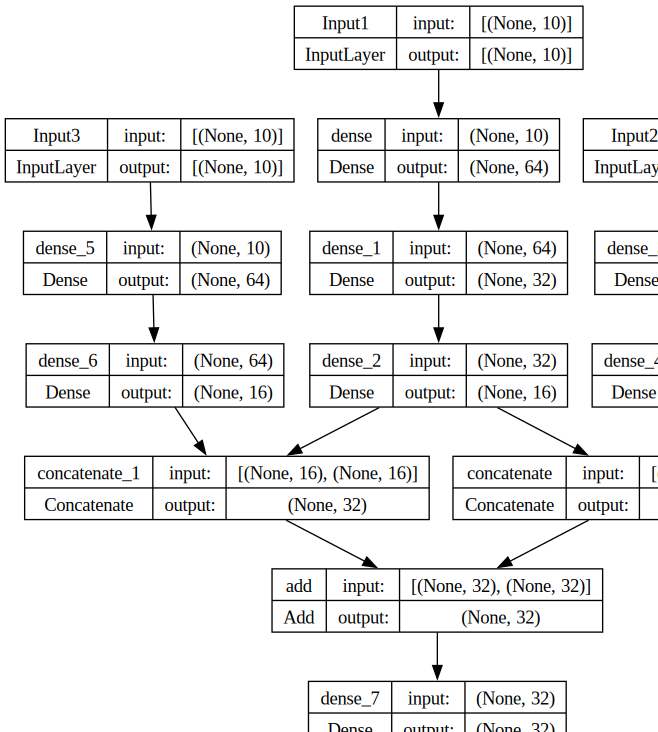

In [10]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. Set the model you created in the model_functional variable.

import tensorflow as tf
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# TODO: Let's draw the image directly to the Notebook document with the SVG class
# Generating a dot graph of the model
dot = model_to_dot(model_functional, show_shapes=True, show_layer_names=True)

# Converting to SVG
svg_image = SVG(dot.create(prog='dot', format='svg'))

# Displaying in Jupyter Notebook
display(svg_image)

In [4]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. Set the model you created in the model_functional variable.
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input1 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                                  
 Input2 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   704       ['Input1[0][0]']              
                                                                                                  
 Input3 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                              

# Assignment 3-2
### Topic: Convolutional neural network and feature matrices (4 points)

**Background**

`Conv2D` layers transform the input image into a mathematical model that is used by tightly coupled layers to create a classification.
Since `Dense` layers can only handle 1D data, first the multidimensional feature map given by the last `Conv2D` layer must be converted to 1D format using the `Flatten` layer.

The following information is required for model configuration:

* the batch size is set to 50. These 50 samples are fed to the model at each step.
* Images are 32×32 pixel RGB images and are set to (32, 32, 3)
* Loss function is `sparse_categorical_crossentropy` and `optimizer` is `Adam()`
* There are 10 different classes in the data.
* The number of epoch cycles is only five (5) iterations. In real apps, there may be 50-100 rounds, but in training tasks, additional rounds are not more useful.
* 20% of the data is test data.
* 80% of the data is training data.

### Input data preprocessing

* Before fitting the neural network, convert the data to `float32` format, resulting in a faster training process on GPU processing.
* Data scaling ensures that the weight updates are smaller, which improves the final output and eases data processing.

### Building a deep learning model

When using this layer as the first layer in a model, you should provide the keyword argument `input_shape`.
In this example, these inputs are 28x28 RGB images with `channels_last`:

```>>> input_shape = (28, 28, 3)
>>> convLayer = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=input_shape)
```

1. In the task, two `Conv2D` layers are specified in consecutive order (3×3 kernel size + ReLU activation),
    and the numbers of filters for them are 32 and 64.
2. Next, we use the `Flatten` layer to convert the data into a 1D format.
3. There are two `Dense` layers (number of filters 64 and 10) to generate the classification.
   The last layer is not activated with ReLU, but with Softmax, resulting in a multi-class probability distribution in response to the question
   "which class is most likely?".

#### Compiling and fitting the model

After defining the deep learning architecture, we can build the model and fit the data and start test phase with test dataset.

1. Compile the model (`model.compile`)
2. Fit the data to the model (`model.fit`)
3. Evaluate model results (`model.evaluate`) using separate test data.

**Evaluating and printing:**
```
Test loss: ??? and Test accuracy: ???
```

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam 

# Loading and preprocess the dataset
(input_train, target_train), (input_test, target_test) = tf.keras.datasets.cifar10.load_data()
input_train, input_test = input_train.astype('float32') / 255.0, input_test.astype('float32') / 255.0

# Model configuration
input_shape = (32, 32, 3)
batch_size = 50
num_classes = 10
epochs = 15

# Building the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])
# Specify your custom learning rate
learning_rate = 1e-3

# Create an Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

# Fitting the model
model.fit(input_train, target_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
800/800 [==============================] - 100s 123ms/step - loss: 1.4670 - accuracy: 0.4942 - val_loss: 1.0476 - val_accuracy: 0.6317
Epoch 2/15
800/800 [==============================] - 100s 125ms/step - loss: 0.9911 - accuracy: 0.6522 - val_loss: 1.0963 - val_accuracy: 0.6551
Epoch 3/15
800/800 [==============================] - 100s 125ms/step - loss: 0.8526 - accuracy: 0.7017 - val_loss: 0.9564 - val_accuracy: 0.6943
Epoch 4/15
800/800 [==============================] - 102s 127ms/step - loss: 0.7665 - accuracy: 0.7328 - val_loss: 1.0763 - val_accuracy: 0.6426
Epoch 5/15
800/800 [==============================] - 101s 126ms/step - loss: 0.6917 - accuracy: 0.7577 - val_loss: 0.7684 - val_accuracy: 0.7379
Epoch 6/15
800/800 [==============================] - 99s 124ms/step - loss: 0.6369 - accuracy: 0.7771 - val_loss: 0.7237 - val_accuracy: 0.7449
Epoch 7/15
800/800 [==============================] - 100s 125ms/step - loss: 0.5825 - accuracy: 0.7957 - val_loss: 0.7317 - 

In [7]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.

# TODO: Create a summary of the model and print evaluation metrics
model.summary()
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} and Test accuracy: {score[1] * 100:.2f}%')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

NameError: name 'input_test' is not defined

#### Tips

* Use 'relu' as activation function in `Conv2D` layers
* How many filters need to be defined?
* In convolution layers, the kernel size is (5,5). What the padding and stride should be, that the output has the same width and height as the input.
* In `MaxPooling2D`, pool_size is (2,2). What should be the `strides` parameter to halve the input?
* `Dropout` deactivates 20% of the neurons in the first `Dropout` layer, and it deactivates 40% in the second `Dropout` layer.

# Assignment 3-3
## Topic: Classification of News headlines using the RNN model (4 p)

Here, data is classified on the basis of whether it is a so-called _clickbait or not_.

The assignment uses the following data:
[https://github.com/bhargaviparanjape/clickbait/tree/master/dataset](https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

### Basic algorithm for the implementation of the assignment

1. Download the data from the **clickbait_data.txt** and **non_clickbait_data.txt** files
2. Let's label the titles in a category (is a clickbait == 1 or is not a clickbait == 0)
3. Split the data into training and test data (75% training data and 25% test data split)
4. Create an RNN model that predicts whether the title is a clickbait title or not
5. Predict the accuracy of the model with the `evaluate` function

## Tips:
* Use `tf.keras.preprocessing.text.Tokenizer` class for numeric conversion
* Create sequences of the same length from titles: (`num_words=number_of_words`)

### RNN and LSTM

_Recurrent neural networks_ (**RNN**) are particularly well suited for sequential data. Well-known practical applications of RNN include e.g. Google's voice search and Apple's Siri.

* RNN has internal memory.
* RNN is a deep learning algorithm that can remember the input.
* Applications of RNN are **LSTM** and **GRU**
* RNN is the recommended algorithm for sequential data, e.g., for written text, time series, weather forecasts, economic data, etc.

In an RNN, the data circulates in an internal loop. When the RNN calculates the output layer, it also considers the previous layer and also the layer before it, because it has short-term memory.

#### The assignment can be done in two different ways

When giving points, it is sufficient that you have done one of the following methods:
1. `SimpleRNN`
2. `LSTM` - the preferred method for this assignment.

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading and preparing the data
with open('clickbait_data.txt', encoding='utf-8') as file:
    clickbait_data = file.read().splitlines()

with open('non_clickbait_data.txt', encoding='utf-8') as file:
    non_clickbait_data = file.read().splitlines()

# Assigning labels and combining datasets
labels = np.array([1] * len(clickbait_data) + [0] * len(non_clickbait_data))
titles = np.array(clickbait_data + non_clickbait_data)

# Shuffling datasets
indices = np.arange(titles.shape[0])
np.random.shuffle(indices)
titles = titles[indices]
labels = labels[indices]

# Preprocessing the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(titles)
sequences = tokenizer.texts_to_sequences(titles)
padded_sequences = pad_sequences(sequences, maxlen=30, padding='post')

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.25, random_state=42)

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=100, input_length=30),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluating the model
results = model.evaluate(X_test, y_test)

print(f"Test Loss: {results[0]} Test Accuracy: {results[1] * 100}%")

Epoch 1/10
1360/1360 [==============================] - 23s 15ms/step - loss: 0.5382 - accuracy: 0.6851
Epoch 2/10
1360/1360 [==============================] - 21s 15ms/step - loss: 0.4731 - accuracy: 0.7202
Epoch 3/10
1360/1360 [==============================] - 21s 15ms/step - loss: 0.5188 - accuracy: 0.7049
Epoch 4/10
1360/1360 [==============================] - 22s 16ms/step - loss: 0.5156 - accuracy: 0.7088
Epoch 5/10
1360/1360 [==============================] - 26s 19ms/step - loss: 0.5152 - accuracy: 0.7070
Epoch 6/10
1360/1360 [==============================] - 23s 17ms/step - loss: 0.5138 - accuracy: 0.7077
Epoch 7/10
1360/1360 [==============================] - 22s 16ms/step - loss: 0.5073 - accuracy: 0.7131
Epoch 8/10
1360/1360 [==============================] - 22s 16ms/step - loss: 0.5098 - accuracy: 0.7102
Epoch 9/10
1360/1360 [==============================] - 22s 16ms/step - loss: 0.4067 - accuracy: 0.7817
Epoch 10/10
454/454 [==============================] - 2s 4ms/st